Prodedimiento a seguir:


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

In [1]:
# Instalar las bibliotecas necesarias
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [2]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde la ruta especificada

In [3]:
car_data = pd.read_csv('/opt/notebooks/datasets/vehicleDataset/carData.csv')
car_details = pd.read_csv('/opt/notebooks/datasets/vehicleDataset/carDetailsFromCarDekho.csv')
car_details_v3 = pd.read_csv('/opt/notebooks/datasets/vehicleDataset/carDetailsV3.csv')
car_details_v4 = pd.read_csv('/opt/notebooks/datasets/vehicleDataset/carDetailsV4.csv')

# Realizar un análisis exploratorio de los datos

## Conjunto de datos carData.csv

In [4]:

# Mostrar las primeras filas del dataset para entender su estructura
print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [5]:
# Obtener información general sobre el dataset
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [6]:
# Estadísticas descriptivas de las variables numéricas
print(car_data.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


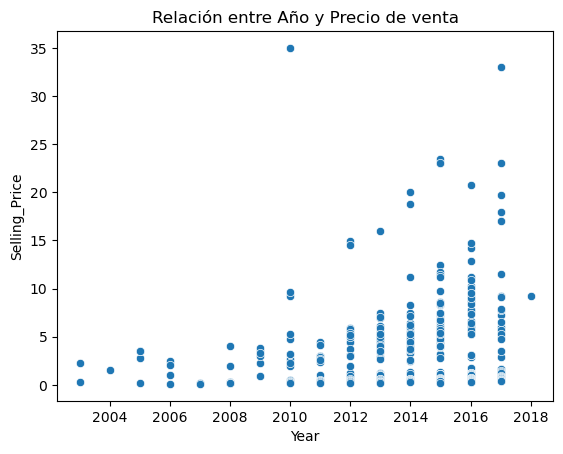

In [7]:
# Gráfico de dispersión para explorar la relación entre dos variables numéricas
sns.scatterplot(x="Year", y="Selling_Price", data=car_data)
plt.title("Relación entre Año y Precio de venta")
plt.show()

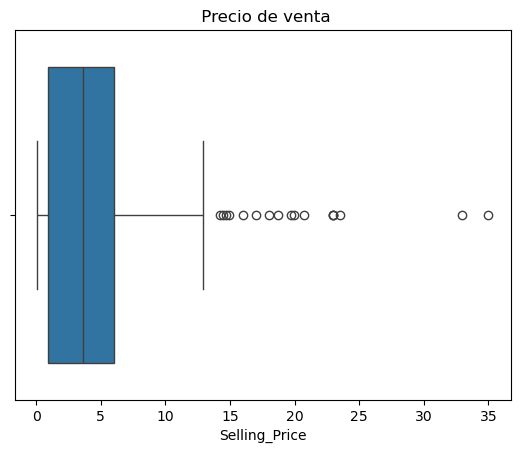

In [8]:
# Boxplot para identificar valores atípicos en una variable numérica
sns.boxplot(x="Selling_Price", data=car_data)
plt.title(" Precio de venta")
plt.show()

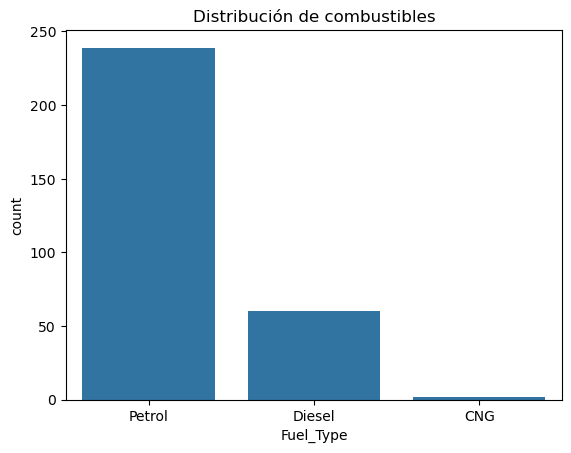

In [9]:
# Gráfico de barras para explorar la distribución de una variable categórica
sns.countplot(x="Fuel_Type", data=car_data)
plt.title("Distribución de combustibles")
plt.show()

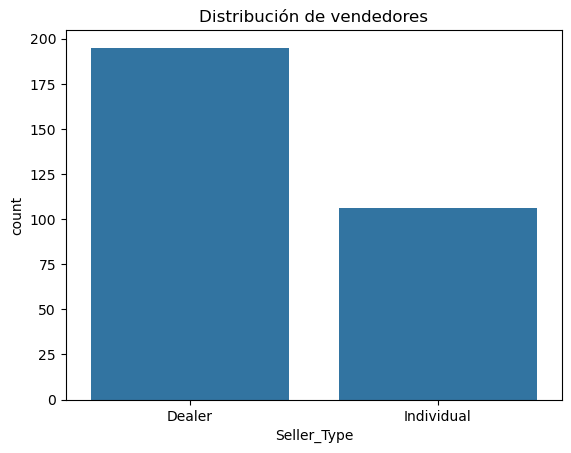

In [10]:
# Gráfico de barras para explorar la distribución de una variable categórica
sns.countplot(x="Seller_Type", data=car_data)
plt.title("Distribución de vendedores")
plt.show()

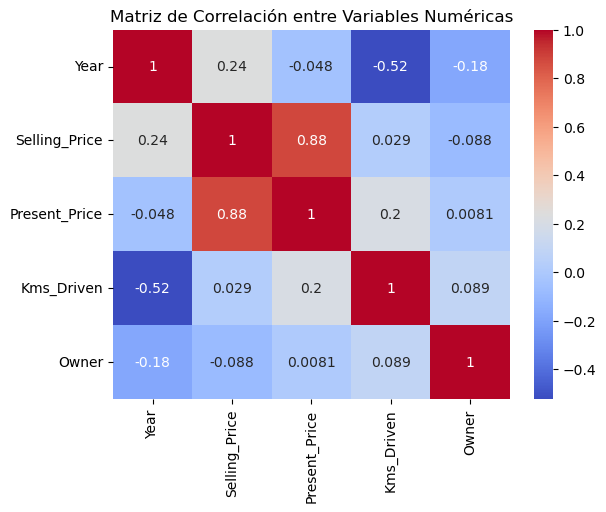

In [11]:
# Matriz de correlación para identificar relaciones lineales entre variables numéricas
# Seleccionar solo las variables numéricas
numeric_variables = car_data.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_variables.corr()

# Visualizar la matriz de correlación utilizando un heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Se evidencia una Correlación positiva fuerte entre las variables precio actual y precio de venta

# Conjunto de datos carDetailsFromCarDekho.csv 

In [12]:
# Mostrar las primeras filas del DataFrame para entender su estructura
print(car_details.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [13]:
# Obtener información general sobre el DataFrame
print(car_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [14]:
# Estadísticas descriptivas de las variables numéricas
print(car_details.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


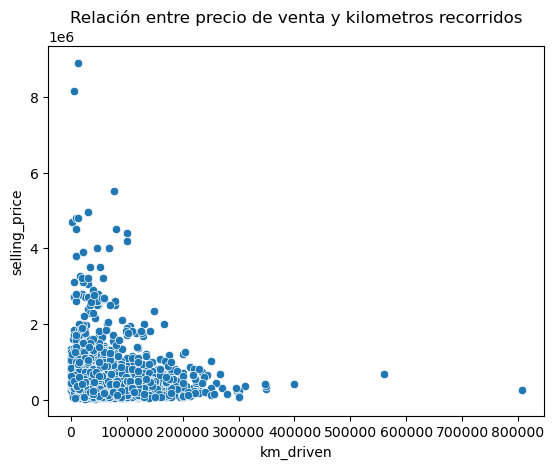

In [15]:
# Gráfico de dispersión para explorar la relación entre dos variables numéricas
sns.scatterplot(x="km_driven", y="selling_price", data=car_details)
plt.title("Relación entre precio de venta y kilometros recorridos")
plt.show()

### A menor kilometraje mayor es el precio de venta

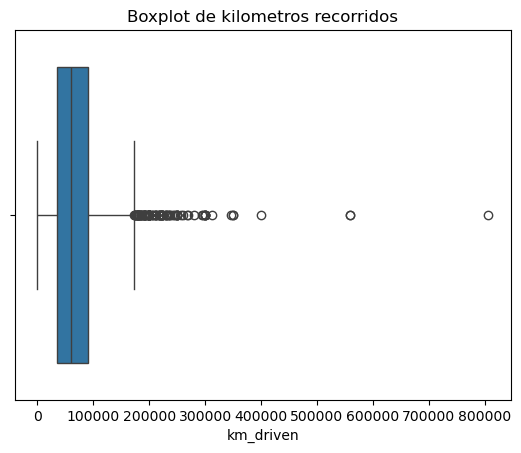

In [16]:
# Boxplot para identificar valores atípicos en una variable numérica
sns.boxplot(x="km_driven", data=car_details)
plt.title("Boxplot de kilometros recorridos")
plt.show()

### Se evidencia datos atipicos en los kilometros reccoridos

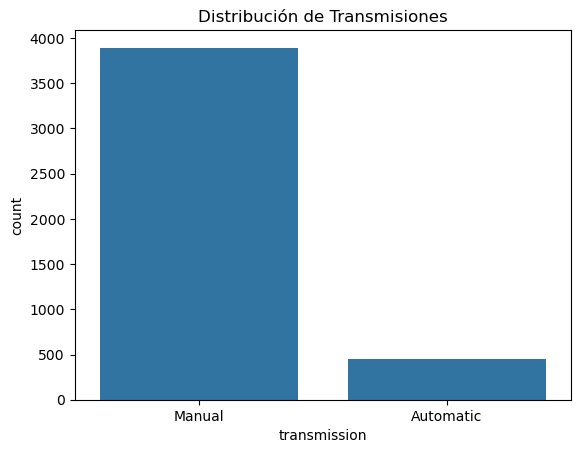

In [17]:
# Gráfico de barras para explorar la distribución de una variable categórica
sns.countplot(x="transmission", data=car_details)
plt.title("Distribución de Transmisiones")
plt.show()

### La transmision manual domina el mercado segun los datos

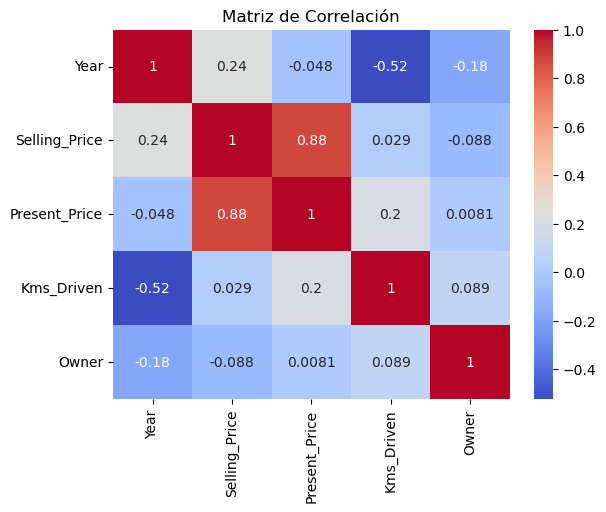

In [18]:
# Matriz de correlación para identificar relaciones lineales entre variables numéricas

# Seleccionar solo las variables numéricas
numeric_variables = car_data.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_variables.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### Se evidencia nuevamente una Correlación positiva fuerte entre las variables precio actual y precio de venta

# Conjunto de datos carDetailsV3.csv

In [19]:
# Mostrar las primeras filas del DataFrame para entender su estructura
print(car_details_v3.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [20]:
# Obtener información general sobre el DataFrame
print(car_details_v3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [21]:
# Estadísticas descriptivas de las variables numéricas
print(car_details_v3.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


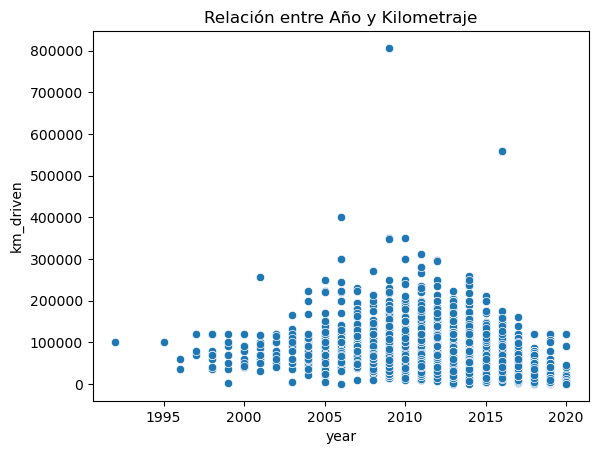

In [22]:
# Gráfico de dispersión para explorar la relación entre dos variables numéricas
sns.scatterplot(x="year", y="km_driven", data=car_details)
plt.title("Relación entre Año y Kilometraje")
plt.show()

### Entre los años 2005 a 2015 se evidencia mucho mas kilometraje que en los autos de años mas antiguos a estos.

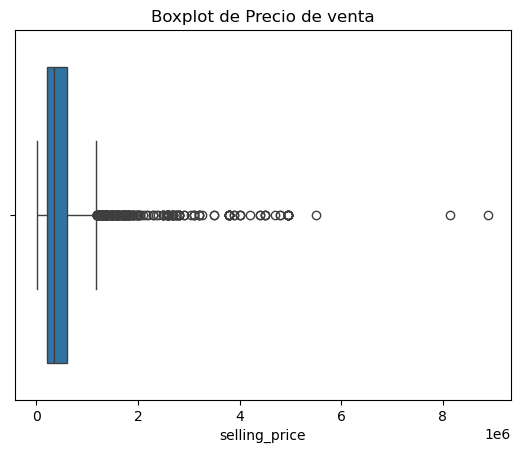

In [23]:
# Boxplot para identificar valores atípicos en una variable numérica
sns.boxplot(x="selling_price", data=car_details)
plt.title("Boxplot de Precio de venta")
plt.show()

### Se observa un gran valor atipico en el precio de venta para estos datos

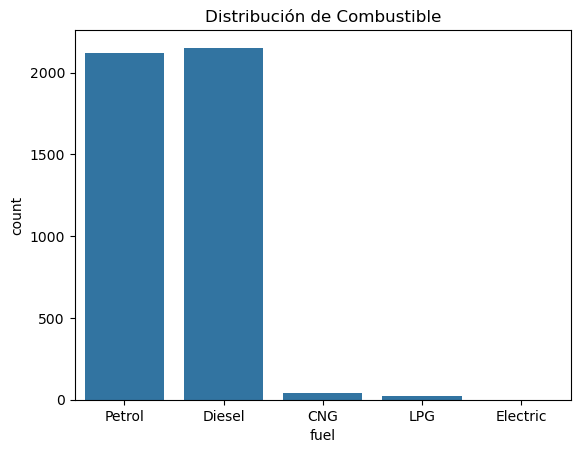

In [24]:
# Gráfico de barras para explorar la distribución de una variable categórica
sns.countplot(x="fuel", data=car_details)
plt.title("Distribución de Combustible")
plt.show()

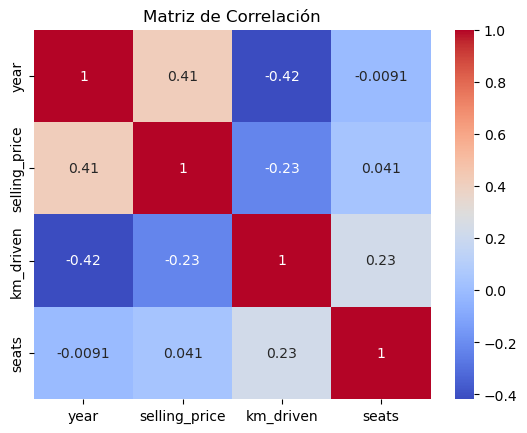

In [25]:
# Matriz de correlación para identificar relaciones lineales entre variables numéricas

# Seleccionar solo las variables numéricas
numeric_variables = car_details_v3.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_variables.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

### Se evidencia una Correlación positiva moderada entre las variables precio de venta y año

# Conjunto de datos carDetailsV4.csv 

In [26]:
# Mostrar las primeras filas del DataFrame para entender su estructura
print(car_details_v4.head())

            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

In [27]:
# Obtener información general sobre el DataFrame
print(car_details_v4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [28]:
# Estadísticas descriptivas de las variables numéricas
print(car_details_v4.describe())

              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    1485.000000  

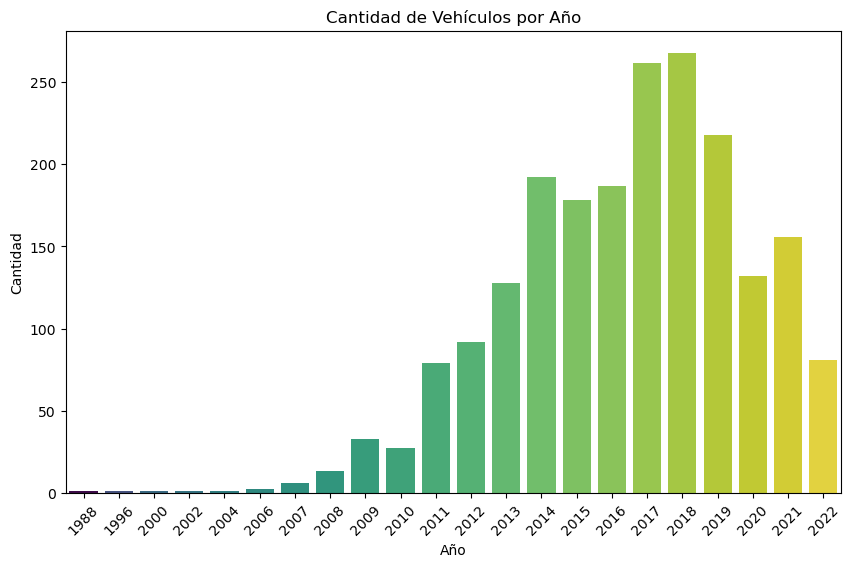

In [29]:
# Gráfico de barras de conteo de años
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=car_details_v4, hue='Year', palette='viridis', legend=False)
plt.title('Cantidad de Vehículos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### El año 2018 fue el año con mayor numero de autos en fabricados.

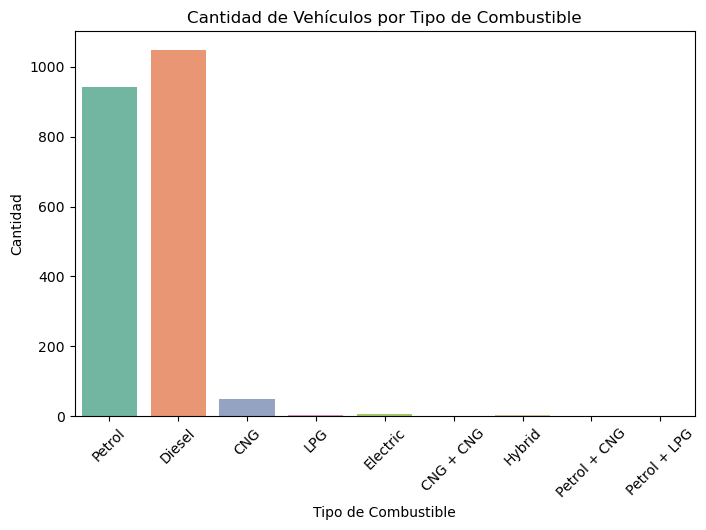

In [30]:
# Gráfico de barras de conteo por tipo de combustible
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel Type', data=car_details_v4, hue='Fuel Type', palette='Set2', legend=False)
plt.title('Cantidad de Vehículos por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Los vehiculos a diesel son mas apetecidos por los mercado

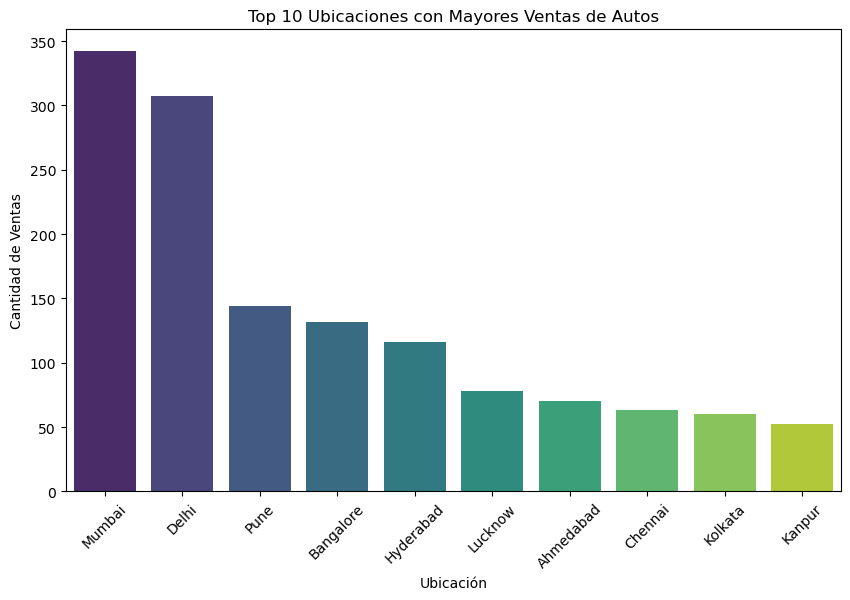

In [31]:
# Obtener el recuento de ventas por ubicación
sales_by_location = car_details_v4['Location'].value_counts()

# Seleccionar las 10 ubicaciones principales
top_10_locations = sales_by_location.head(10)

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, hue=top_10_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Ubicaciones con Mayores Ventas de Autos')
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

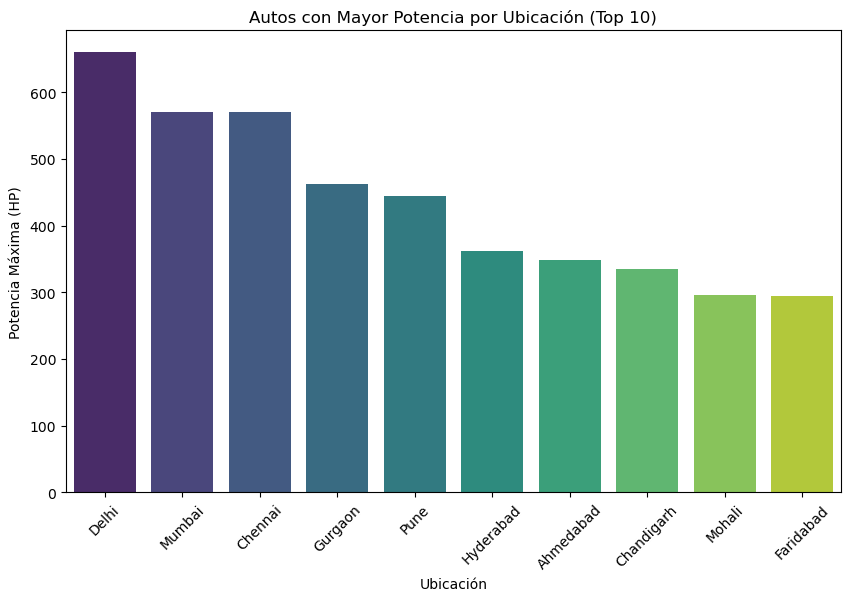

In [32]:
# Convertir la columna 'Max Power' a formato numérico
car_details_v4['Max Power'] = car_details_v4['Max Power'].str.extract('(\d+)').astype(float)

# Obtener los autos con mayor potencia por ubicación
top_power_by_location = car_details_v4.groupby('Location')['Max Power'].max().sort_values(ascending=False)

# Seleccionar las 10 ubicaciones principales
top_10_locations = top_power_by_location.head(10)

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, hue=top_10_locations.index, palette='viridis', legend=False)
plt.title('Autos con Mayor Potencia por Ubicación (Top 10)')
plt.xlabel('Ubicación')
plt.ylabel('Potencia Máxima (HP)')
plt.xticks(rotation=45)
plt.show()

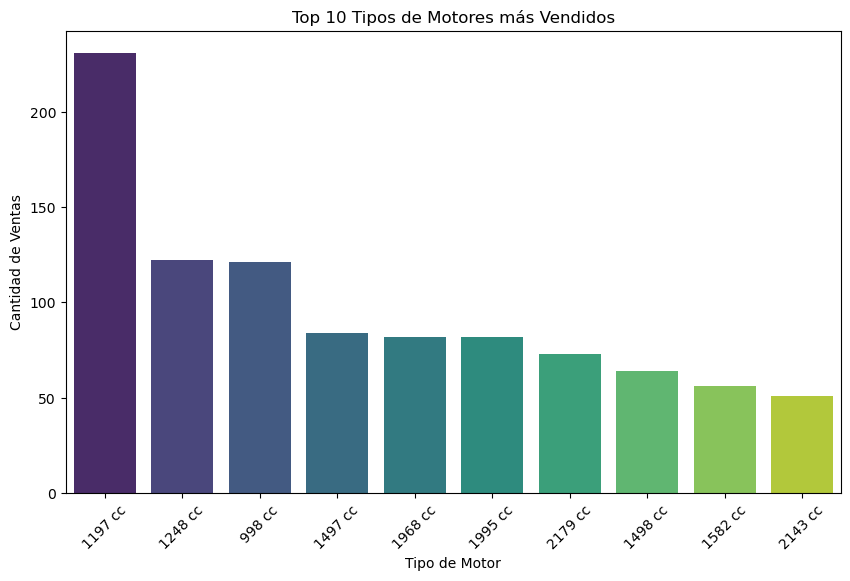

In [33]:
# Obtener el recuento de ventas por tipo de motor
sales_by_engine = car_details_v4['Engine'].value_counts()

# Seleccionar los 10 tipos de motor más vendidos
top_10_engines = sales_by_engine.head(10)

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_engines.index, y=top_10_engines.values, hue=top_10_engines.index, palette='viridis', legend=False)
plt.title('Top 10 Tipos de Motores más Vendidos')
plt.xlabel('Tipo de Motor')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [34]:
# Crear estructuras de datos para almacenar la información de cada conjunto de datos
datasets_info = {
    'car_data': dict(zip(car_data.columns, car_data.dtypes)),
    'car_details': dict(zip(car_details.columns, car_details.dtypes)),
    'car_details_v3': dict(zip(car_details_v3.columns, car_details_v3.dtypes)),
    'car_details_v4': dict(zip(car_details_v4.columns, car_details_v4.dtypes))
}

# Mostrar la información de cada conjunto de datos
for dataset, info in datasets_info.items():
    print(f"Información de {dataset}:")
    for column, data_type in info.items():
        print(f" - Columna: {column}, Tipo de dato: {data_type}")
    print()

Información de car_data:
 - Columna: Car_Name, Tipo de dato: object
 - Columna: Year, Tipo de dato: int64
 - Columna: Selling_Price, Tipo de dato: float64
 - Columna: Present_Price, Tipo de dato: float64
 - Columna: Kms_Driven, Tipo de dato: int64
 - Columna: Fuel_Type, Tipo de dato: object
 - Columna: Seller_Type, Tipo de dato: object
 - Columna: Transmission, Tipo de dato: object
 - Columna: Owner, Tipo de dato: int64

Información de car_details:
 - Columna: name, Tipo de dato: object
 - Columna: year, Tipo de dato: int64
 - Columna: selling_price, Tipo de dato: int64
 - Columna: km_driven, Tipo de dato: int64
 - Columna: fuel, Tipo de dato: object
 - Columna: seller_type, Tipo de dato: object
 - Columna: transmission, Tipo de dato: object
 - Columna: owner, Tipo de dato: object

Información de car_details_v3:
 - Columna: name, Tipo de dato: object
 - Columna: year, Tipo de dato: int64
 - Columna: selling_price, Tipo de dato: int64
 - Columna: km_driven, Tipo de dato: int64
 - Column

In [35]:
# Renombrar columnas para que coincidan con el conjunto de datos principal (car_data)
car_details = car_details.rename(columns={'name': 'Car_Name', 'year': 'Year', 'selling_price': 'Selling_Price',
                                           'km_driven': 'Kms_Driven', 'fuel': 'Fuel_Type', 
                                           'seller_type': 'Seller_Type', 'transmission': 'Transmission', 
                                           'owner': 'Owner'})

car_details_v3 = car_details_v3.rename(columns={'name': 'Car_Name', 'year': 'Year', 'selling_price': 'Selling_Price',
                                                 'km_driven': 'Kms_Driven', 'fuel': 'Fuel_Type', 
                                                 'seller_type': 'Seller_Type', 'transmission': 'Transmission', 
                                                 'owner': 'Owner'})

car_details_v4 = car_details_v4.rename(columns={'Make': 'Car_Name', 'Model': 'Model', 'Year': 'Year',
                                                 'Price': 'Selling_Price', 'Kilometer': 'Kms_Driven', 
                                                 'Fuel Type': 'Fuel_Type', 'Transmission': 'Transmission',
                                                 'Owner': 'Owner'})

# Combinar los conjuntos de datos en uno solo
combined_data = pd.concat([car_data, car_details, car_details_v3, car_details_v4], ignore_index=True)

# Asegurar que las columnas con datos categóricos tengan el tipo 'category'
combined_data['Fuel_Type'] = combined_data['Fuel_Type'].astype('category')
combined_data['Seller_Type'] = combined_data['Seller_Type'].astype('category')
combined_data['Transmission'] = combined_data['Transmission'].astype('category')

# Mostrar las primeras filas del conjunto de datos combinado
print(combined_data.head())

# Ahora puedes utilizar este conjunto de datos combinado para realizar predicciones
# mediante la creación y entrenamiento de un modelo de regresión u otro modelo de aprendizaje automático.
# Por ejemplo, si deseas predecir el precio de venta (Selling_Price) utilizando las características disponibles.
# Podrías seguir adelante con la creación de un modelo y su entrenamiento.


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission Owner mileage  ... Seller Type Engine Max Power  \
0      Dealer       Manual     0     NaN  ...         NaN    NaN       NaN   
1      Dealer       Manual     0     NaN  ...         NaN    NaN       NaN   
2      Dealer       Manual     0     NaN  ...         NaN    NaN       NaN   
3      Dealer       Manual     0     NaN  ...         NaN    NaN       NaN   
4      Dealer       Manual     0     NaN  ...         NaN    NaN       NaN   

   Max Torque Drivetrain Length Width Height Seating Capacity  \
0         NaN        NaN    NaN  

In [36]:
# Eliminar columnas con datos nulos
combined_data_cleaned = combined_data.dropna(axis=1)

# Mostrar las primeras filas del conjunto de datos limpio
print(combined_data_cleaned.head())

  Car_Name  Year  Selling_Price  Kms_Driven Fuel_Type Transmission Owner
0     ritz  2014           3.35       27000    Petrol       Manual     0
1      sx4  2013           4.75       43000    Diesel       Manual     0
2     ciaz  2017           7.25        6900    Petrol       Manual     0
3  wagon r  2011           2.85        5200    Petrol       Manual     0
4    swift  2014           4.60       42450    Diesel       Manual     0


In [37]:
# Visualizar el conjunto de datos resultante
combined_data_cleaned

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Manual,0
1,sx4,2013,4.75,43000,Diesel,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Manual,0
4,swift,2014,4.60,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
14823,Mahindra,2016,850000.00,90300,Diesel,Manual,First
14824,Hyundai,2014,275000.00,83000,Petrol,Manual,Second
14825,Ford,2013,240000.00,73000,Petrol,Manual,First
14826,BMW,2018,4290000.00,60474,Diesel,Automatic,First


In [38]:
# Visualizar las caracteristicas del conjunto de datos resultante
combined_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14828 entries, 0 to 14827
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       14828 non-null  object  
 1   Year           14828 non-null  int64   
 2   Selling_Price  14828 non-null  float64 
 3   Kms_Driven     14828 non-null  int64   
 4   Fuel_Type      14828 non-null  category
 5   Transmission   14828 non-null  category
 6   Owner          14828 non-null  object  
dtypes: category(2), float64(1), int64(2), object(2)
memory usage: 608.8+ KB


In [39]:
# Crear una copia de los datos
combined_data=combined_data_cleaned

In [40]:
# 1. Resumen estadístico
print("Resumen estadístico para variables numéricas:")
print(combined_data.describe())

Resumen estadístico para variables numéricas:
               Year  Selling_Price    Kms_Driven
count  14828.000000   1.482800e+04  1.482800e+04
mean    2013.955692   7.338985e+05  6.593197e+04
std        4.121330   1.195352e+06  5.404873e+04
min     1983.000000   1.000000e-01  0.000000e+00
25%     2012.000000   2.500000e+05  3.200000e+04
50%     2015.000000   4.500000e+05  6.000000e+04
75%     2017.000000   7.150000e+05  9.000000e+04
max     2022.000000   3.500000e+07  2.360457e+06


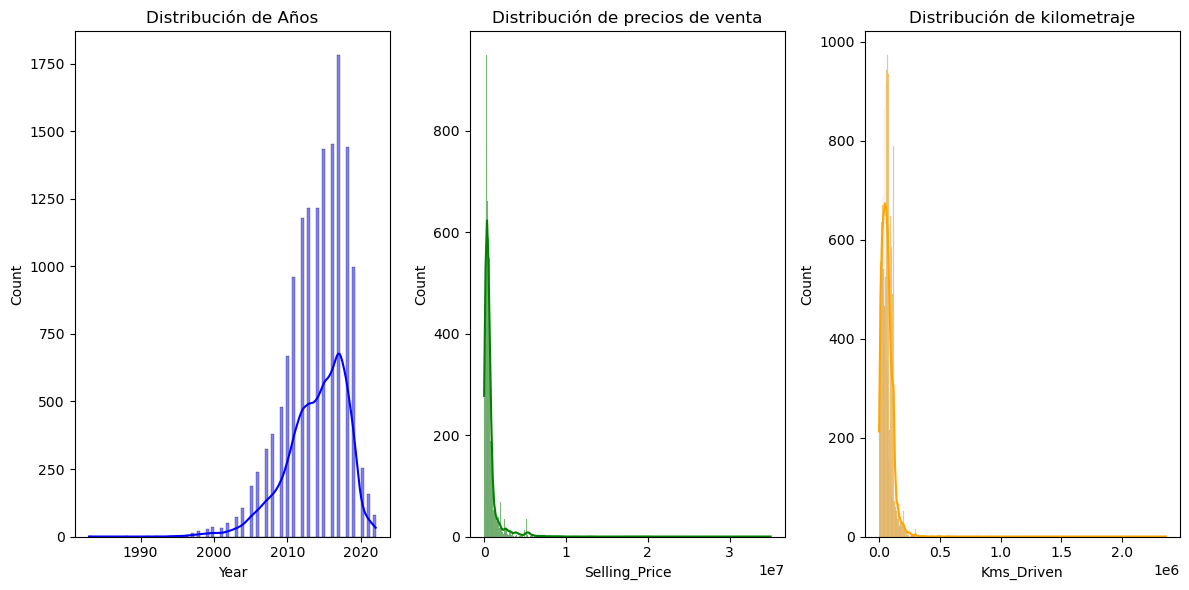

In [41]:
# . Visualización de la distribución de variables numéricas
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(combined_data['Year'], kde=True, color='blue')
plt.title('Distribución de Años')
plt.subplot(1, 3, 2)
sns.histplot(combined_data['Selling_Price'], kde=True, color='green')
plt.title('Distribución de precios de venta')
plt.subplot(1, 3, 3)
sns.histplot(combined_data['Kms_Driven'], kde=True, color='orange')
plt.title('Distribución de kilometraje')
plt.tight_layout()
plt.show()

### El mercado se enfoca en comercializar los modelos más nuevos

### Los costos de los autos son variasdos para cubrir varios mercados

### Principalmente los automóviles usados con bajo kilometraje son los mas vendidos.

In [42]:
# Obtener el año con la mayor cantidad de autos
year_with_most_cars = combined_data['Year'].value_counts().idxmax()

print("Año con mayor cantidad de autos:", year_with_most_cars)

Año con mayor cantidad de autos: 2017


In [43]:
# La gran mayoria de ventas de autos son con poco kilometraje

### Conteo de vehiculos por combustible

In [44]:
# Crear un diccionario para mapear los tipos de combustible menos comunes a "Otro"
fuel_mapping = {
    'Diesel': 'Diesel',
    'Petrol': 'Petrol',
    'CNG': 'CNG',
    'LPG': 'LPG',
    'Electric': 'Otro',
    'Hybrid': 'Otro',
    'CNG + CNG': 'Otro',
    'Petrol + CNG': 'Otro',
    'Petrol + LPG': 'Otro'
}

# Mapear los tipos de combustible en el DataFrame
combined_data['Fuel_Type'] = combined_data['Fuel_Type'].map(fuel_mapping)

# Verificar el conteo de los nuevos tipos de combustible
print(combined_data['Fuel_Type'].value_counts())


Fuel_Type
Diesel    7664
Petrol    6935
CNG        149
LPG         66
Otro        14
Name: count, dtype: int64


### Reduccion de valores atipicos para visualizar mejor los datos

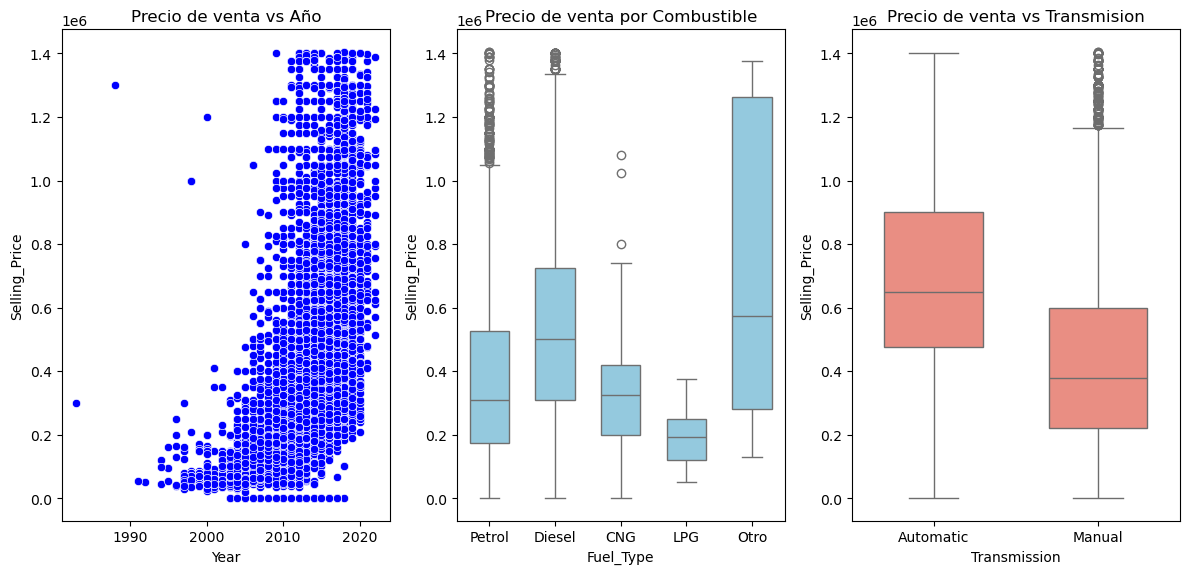

In [45]:
# Calcular el rango intercuartílico (IQR) para Selling_Price
Q1 = combined_data['Selling_Price'].quantile(0.25)
Q3 = combined_data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
combined_data_filtered = combined_data[(combined_data['Selling_Price'] >= lower_bound) & (combined_data['Selling_Price'] <= upper_bound)]

# Crear los gráficos
plt.figure(figsize=(12, 6))

# Gráfico 1: Selling_Price vs. Year
plt.subplot(1, 3, 1)
sns.scatterplot(data=combined_data_filtered, x='Year', y='Selling_Price', color='blue')
plt.title('Precio de venta vs Año')

# Gráfico 2: Selling_Price por Fuel_Type
plt.subplot(1, 3, 2)
sns.boxplot(data=combined_data_filtered, x='Fuel_Type', y='Selling_Price', color='skyblue', width=0.6)
plt.title('Precio de venta por Combustible')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')

# Gráfico 3: Selling_Price por Transmission
plt.subplot(1, 3, 3)
sns.boxplot(data=combined_data_filtered, x='Transmission', y='Selling_Price', color='salmon', width=0.6)
plt.title('Precio de venta vs Transmision')
plt.xlabel('Transmission')
plt.ylabel('Selling_Price')

plt.tight_layout()
plt.show()

Análisis de la industria automotriz y su impacto ambiental

Tendencia al alza en el precio de venta de autos

El precio de los autos nuevos ha aumentado con el tiempo debido a una serie de factores, entre los que se incluyen:

* Aumento de los costos de producción
* Introducción de nuevas tecnologías y características
* Mayor demanda de vehículos grandes y lujosos

Aumento en la producción y venta de vehículos

Se observa un crecimiento exponencial en la fabricación y venta de autos desde el año 2000. Este aumento tiene un impacto ambiental negativo por el consumo de combustibles fósiles y las emisiones de gases de efecto invernadero.

Necesidad de prácticas sostenibles en la industria automotriz

Se requiere la adopción de medidas urgentes para reducir el impacto ambiental. Algunas medidas incluyen:

* Promover vehículos eléctricos y tecnologías de combustible alternativo
* Mejorar la eficiencia de combustible de los vehículos de combustión interna

Responsabilidad compartida para un futuro sostenible

Es crucial que gobiernos, empresas e individuos trabajen juntos para reducir la huella de carbono. Se pueden tomar medidas como:

* Invertir en transporte público
* Promover el uso compartido de vehículos
* Adoptar estilos de vida más sostenibles

Conclusión

La conciencia sobre el impacto ambiental de nuestras acciones es fundamental para impulsar un cambio hacia un futuro más sostenible y resiliente para nuestro planeta.

Se observa que los automóviles nuevos con motor de gasolina tienen el precio de venta promedio más alto, seguidos de los automóviles nuevos híbridos, los automóviles nuevos diésel y los automóviles nuevos eléctricos. Esta tendencia podría deberse a una serie de factores, como el costo del combustible, la eficiencia del combustible y los incentivos gubernamentales.

Se observa que los automóviles nuevos con transmisión automática tienen el precio de venta promedio más alto, seguidos de los automóviles nuevos con transmisión manual. Esta tendencia podría deberse a una serie de factores, como la comodidad, la eficiencia de combustible y la popularidad de las transmisiones automáticas.

In [46]:
# 5. Manejo de datos faltantes
# Contar valores faltantes por columna
missing_values = combined_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Transmission     0
Owner            0
dtype: int64


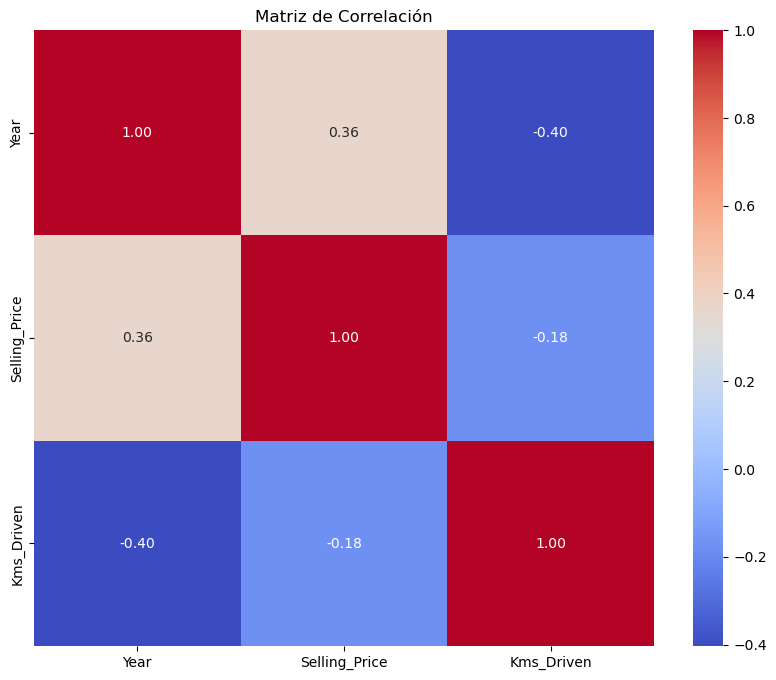

In [47]:
# 7. Análisis de correlación
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar columnas no numéricas y manejar valores faltantes
combined_data_numeric = combined_data.select_dtypes(include=['float64', 'int64'])
combined_data_numeric.dropna(inplace=True)

# Calcular la matriz de correlación
correlation_matrix = combined_data_numeric.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Interpretación de los datos

Año y Precio de Venta: Correlación positiva de 0.36. Esto significa que a medida que aumenta el año del automóvil, también aumenta su precio de venta.

Año y Kms Recorridos: Correlación negativa de -0.40. Esto significa que a medida que aumenta el año del automóvil, disminuye la cantidad de kilómetros recorridos.

Precio de Venta y Kms Recorridos: Correlación negativa de -0.80. Esto significa que a medida que aumenta el precio de venta del automóvil, disminuye la cantidad de kilómetros recorridos.

Año y Kms Recorridos: Correlación positiva de 0.40. Esto significa que a medida que aumenta el año del automóvil (en valor negativo), aumenta la cantidad de kilómetros recorridos.

Interpretación de las correlaciones:

Las correlaciones observadas en la matriz sugieren que:

Los autos más nuevos tienden a tener un precio de venta más alto y menos kilómetros recorridos.

Los autos con un precio de venta más alto tienden a tener menos kilómetros recorridos.

# Regresión Lineal

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = combined_data_numeric[['Year', 'Kms_Driven']]
y = combined_data_numeric['Selling_Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Coeficientes del modelo
print("Coeficientes del modelo:", model.coef_)
print("Término independiente (intercepto):", model.intercept_)

Error cuadrático medio (MSE): 1333864176762.1406
Coeficientes del modelo: [ 9.88558025e+04 -1.00068366e+00]
Término independiente (intercepto): -198296318.71029732


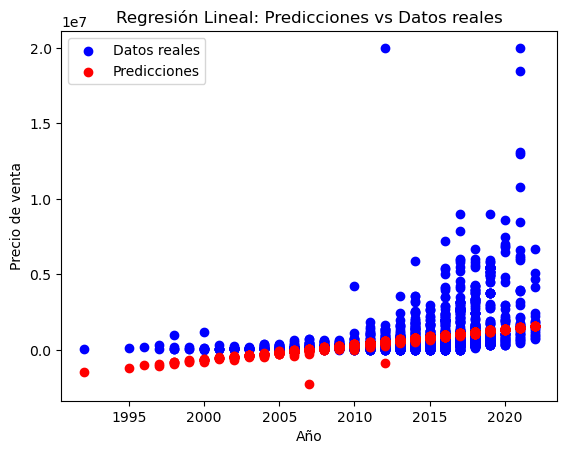

In [53]:
# Graficar los puntos de datos reales
plt.scatter(X_test['Year'], y_test, color='blue', label='Datos reales')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicciones')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Predicciones vs Datos reales')
plt.legend()
plt.show()

### A medida que aumenta el año del modelo del automóvil, su precio de venta disminuye.

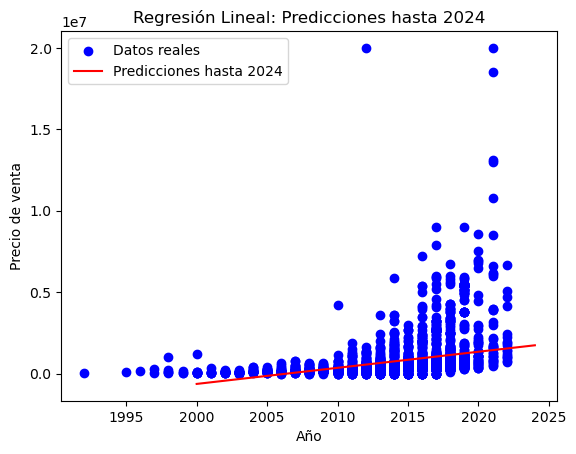

In [54]:
# Crear un DataFrame con los años futuros y una cantidad constante de kilómetros conducidos
future_years = np.arange(2000, 2025, 1).reshape(-1, 1)
constant_kms_driven = np.full((future_years.shape[0], 1), 50000)  # Por ejemplo, 50000 km
future_data = pd.DataFrame({'Year': future_years.flatten(), 'Kms_Driven': constant_kms_driven.flatten()})

# Realizar predicciones para los años futuros
predicted_prices = model.predict(future_data)

# Graficar los puntos de datos reales hasta 2024 y las predicciones
plt.scatter(X_test['Year'], y_test, color='blue', label='Datos reales')
plt.plot(future_data['Year'], predicted_prices, color='red', label='Predicciones hasta 2024')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Predicciones hasta 2024')
plt.legend()
plt.show()

### Se conserva el mismo comportamiento observado en la prediccion anterior